In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
from skimage.transform import resize

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images_rgb = np.repeat(train_images, 3, axis=-1)
test_images_rgb = np.repeat(test_images, 3, axis=-1)

train_images_resized = np.array([resize(img, (32, 32)) for img in train_images_rgb])
test_images_resized = np.array([resize(img, (32, 32)) for img in test_images_rgb])

train_images_resized, val_images_resized, train_labels, val_labels = train_test_split(train_images_resized, train_labels, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
base_model = VGG16(include_top=False, weights="imagenet" , input_shape=(32, 32, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/10
750/750 [==============================] - 449s 599ms/step - loss: 0.5492 - accuracy: 0.8051 - val_loss: 0.4303 - val_accuracy: 0.8432
Epoch 2/10
750/750 [==============================] - 503s 671ms/step - loss: 0.4577 - accuracy: 0.8361 - val_loss: 0.3956 - val_accuracy: 0.8559
Epoch 3/10
750/750 [==============================] - 505s 674ms/step - loss: 0.4179 - accuracy: 0.8497 - val_loss: 0.4022 - val_accuracy: 0.8510
Epoch 4/10
750/750 [==============================] - 501s 667ms/step - loss: 0.3915 - accuracy: 0.8579 - val_loss: 0.3814 - val_accuracy: 0.8567
Epoch 5/10
750/750 [==============================] - 501s 668ms/step - loss: 0.3701 - accuracy: 0.8658 - val_loss: 0.3717 - val_accuracy: 0.8602
Epoch 6/10
750/750 [==============================] - 446s 594ms/step - loss: 0.3583 - accuracy: 0.8695 - val_loss: 0.3559 - val_accuracy: 0.8682
Epoch 7/10
750/750 [==============================] - 500s 667ms/step - loss: 0.3418 - accuracy: 0.8755 - val_loss: 0.3689 -

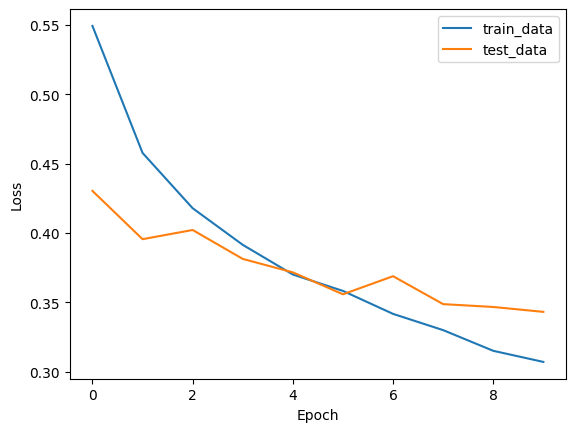

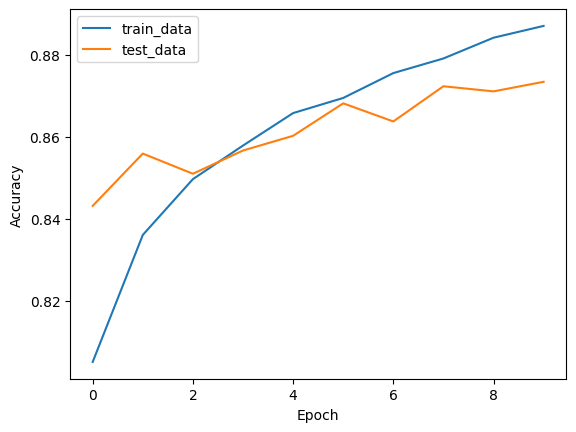

In [5]:
history = model.fit(train_images_resized, train_labels, epochs=10, verbose=1, batch_size=64, validation_data=(val_images_resized, val_labels))

plt.plot(history.history['loss'], label='train_data')
plt.plot(history.history['val_loss'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_data')
plt.plot(history.history['val_accuracy'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
test_loss, test_accuracy = model.evaluate(test_images_resized, test_labels)
print(f'Точність на тестовому наборі: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 76s 243ms/step - loss: 0.3683 - accuracy: 0.8695
Точність на тестовому наборі: 86.95%
